# __1. 탐색적 데이터 분석__

##### 파이썬 패키지 import

In [3]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

데이터 import

In [4]:
state = pd.read_csv('./data/state.csv')
dfw = pd.read_csv('./data/dfw_airline.csv')
sp500_px = pd.read_csv('./data/sp500_data.csv.gz', index_col=0)
sp500_sym = pd.read_csv('./data/sp500_sectors.csv')
kc_tax = pd.read_csv('./data/kc_tax.csv.gz')
lc_loans = pd.read_csv('./data/lc_loans.csv')
airline_stats = pd.read_csv('./data/airline_stats.csv')

## __1.1 정형화된 데이터의 요소__

#### 수치형 : 숫자를 이용해 표현할 수 있는 데이터
#### 연속형 : 일정 범위 안에서 어떤 값이든 취할 수 있는 데이터
#### 이산 : 정수 값만 취할 수 있는 데이터
#### 범주형 : 가능하나 범주 안의 값만을 취하는 데이터 (=명목형)
#### 이진 : 두 개의 값만을 갖는 범주형 데이터의 특수한 경우
#### 순서형 : 값들 사이에 분명한 순위가 있는 범주형 데이터

## __1.2 테이블 데이터__

#### 테이블 데이터 : 스프레드시트와 같은 테이블 형테의 데이터 구조(이차원 행렬)
#### 피처 : 일반적으로 테이블의 각 열
#### 결과 : 데이터 과학 프로젝트의 목표: 어떠한 결과를 예측, 결과 예측을 위해 피처 사용
#### 레코드 : 일반적으로 테이블의 각 행

## __1.3 위치 추정__

### __1.3.1 평균__

#### 평균 : 모든 값을 총합의 개수로 나눈 값
## $\bar{x} = \frac{\sum^n_{i=1}{x}_i}{n}$

#### 절사평균 : 정해진 개수의 극단값을 제외한 나머지 값들의 평균
#### p : 가장 크고 작은 값들의 개수
## $\bar{x} = \frac{\sum^{n-p}_{i=p+1} {x}_{(i)}}{n-2p}$

#### 가중평균 : 데이터를 정렬한 후, 각 가중치 값을 위에서부터 더할 때, 총합의 중간이 위치하는 데이터 값
#### ${w_i} =$ 사용자가 지정한 가중치
## $\bar{x_i} = \frac{\sum^n_{i=1}w_i x_i}{\sum^n_{i=1} {w_i}}$

### __1.3.2 중간값과 로버스트 추정__

#### 중간값 : 데이터에서 가장 가운데 위치한 값
#### 가중 중간값 : 데이터를 정렬한 후, 각 가중치 값을 위에서부터 더할 때, 총합의 중간이 위치하는 데이터 값
#### 로버스트하다 : 극단값에 민감하지 않다
#### 특잇값(outliner) : 대부분의 값과 매우 다른 데이터 값(=극단값)

### __예제 : 인구에 따른 살인 비율의 위치 추정__

In [3]:
print(state['Population'].mean()) # 평균
print(trim_mean(state['Population'],0.1)) # 절사평균
print(state['Population'].median()) # 중간값

6162876.3
4783697.125
4436369.5


In [4]:
# 가중평균

print(np.average(state['Murder.Rate'], weights=state['Population'])) # 가중평균
print(wquantiles.median(state['Murder.Rate'], weights=state['Population'])) # 가중 중간값

4.445833981123393
4.4


## __1.4 변이 추정__

#### 편차 : 관측값과 위치 추정값 사이의 차이 (=잔차)
#### 평균절대편차 : 편차의 절댓값의 평균
## 평균절대편차 = $\frac{\sum_{i=1}^{n} \left\vert{x_i-\bar{x}}\right\vert}{n}$

#### 분산 : 잔차의 제곱의 평균, 잔차르르 제곱한 값을 n-1으로 나눈 값
## $s^2 = \frac{\sum^n_{i=1}(x_i-\bar{x})^2}{n-1}$

#### 표준편차 : 분산의 제곱근

## $s = \sqrt{분산}$

#### __자유도__
#### 분산을 구할 떄 왜 n-1을 분모로 사용하는 가?

#### 전제 : 표본을 가지고 모집단을 추정하고자 함
#### 분산 수식에 n을 분모로 사용한다면, 모집단의 분산과 표준편차의 참값을 과소평가하게 됨 (=__편향 추정__)

#### n을 사용하는 것이 편향 추정이 되는 이유
#### 자유도 : 추정값을 계산할 때 제약 조건의 개수
#### __표준편차는 표본의 평균을 따른다는 제약 조건이 있기 때문에 n-1의 자유도를 가진다.__

#### 중간값의 중위절대편차(MAD)

### $MAD = 중간값(\left\vert x_1-m \right\vert), (\left\vert x_2-m \right\vert),\cdots, (\left\vert x_N-m \right\vert)$

### __1.4.2 백분위에 기초한 추정__

#### 순서통계량 : 정렬 데이터를 나타내는 통계량
#### 기본 측도 : 가장 큰 값과 가장 작은 값의 차이를 나타내는 범위

#### 백분위수 : 전체 데이터의 P%를 아래에 두는 값
#### 데이터에서 P번째 백분위수는 P퍼센트의 값이 그 값, 그보다 작은 값을 갖고(100-P)퍼센트의 값이 그 값 혹은 그보다 큰 값을 갖는 어떤 값
#### 사분위범위(IQR) : 25번째 백분위수와 75번째 백분위수의 차이

### __예제 : 주별 인구의 변이 추정__

In [5]:
# pandas 메서드 활용

state['Population'].std() # 표준편차

6848235.347401142

In [6]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25) # IQR

4847308.0

In [7]:
robust.scale.mad(state['Population']) # MAD

3849876.1459979336

## __1.5 데이터 분포 탐색하기__

### __1.5.1 백분위수와 상자그림__

#### 상자그림 : 데이터의 분포를 시각화하기 위한 간당한 방법으로 소개한 그림

#### 백분위 수는 분포의 꼬리 부분(외측 범위)를 묘사하는데 적격

### __예제 : 살인율의 백분위수__

In [8]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

findfont: Font family ['NanumSquare'] not found. Falling back to DejaVu Sans.


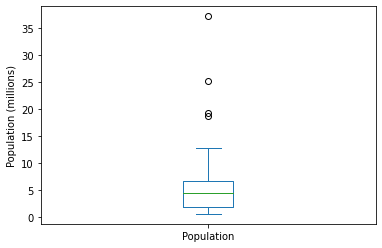

In [9]:
# 상자그림

ax = (state['Population']/1000000).plot.box()
ax.set_ylabel('Population (millions)')

#### 점선 : 수염 - 사분위범위의 1.5배 이상

###  __1.5.2 도수분포표와 히스토그램__

#### 도수분포표 : 어떤 구간(bin)에 해당하는 수치 데이터 값들의 빈도를 나타내는 기록
#### 히스토그램 : x축은 구간, y축은 빈도수를 나타내는 도수 테이블의 그림.

In [10]:
# 도수분포표
binnedPopulation = pd.cut(state['Population'],10) # cut : 값들을 각 구간에 매핑
binnedPopulation.value_counts() # 빈도 수

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

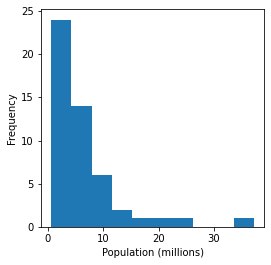

In [11]:
# 히스토그램
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population (millions)')

###  __1.5.3 밀도 그림과 추정__

#### 밀도그림 : 좀 더 부드러운 히스토그램, 히스토그램을 부드러운 곡선으로 나타낸 그림. 커널밀도추정을 주로 사용

Text(0.5, 0, 'Murder Rate (per 100,000)')

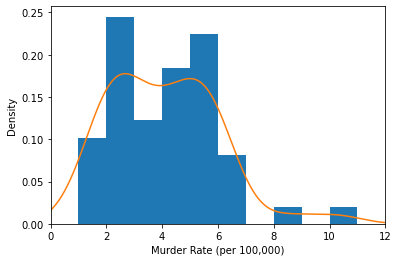

In [11]:
# 밀도 그림
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax) # 플롯이 동일한 그래프에 추가될 수 있도록, (곡선 = 밀도 그림)
ax.set_xlabel('Murder Rate (per 100,000)')

## __1.6 이진 데이터와 범주 데이터 탐색하기__

#### 최빈값 : 데이터에서 가장 자주 등장하는 범주 혹은 값
#### 기댓값 : 범주에 해당하는 어떤 수치가 있을 때, 범주의 출현 확률에 따른 평균
#### 막대도표 : 각 범주의 빈도수 혹은 비율을 막대로 나타낸 그림
#### 파이그림 : 각 범주의 빈도수 혹은 비율을 원의 부채꼴 모양으로 나타낸 그림

### __예제 : 댈러스-포트워스 공항의 항공ㄴ이 운행 지연 원인별 퍼센트 비율__

Text(0, 0.5, 'Count')

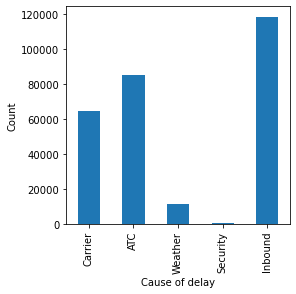

In [12]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

#### __막대도표와 히스토그램과 차이__

#### 막대도표의 x축 : 각 요인변수의 서로 다른 범주
#### 히스토그램의 x축 : 수치적으로 나타낼 수 있는 하나의 변수의 값 

### __1.6.2 기댓값__

#### __기댓값 계산__

#### 1) 각 결과값과 발생 확률을 곱한다
#### 2) 이 값들을 모두 더한다

#### 가중평균과 같은 꼴 -> 주관적 평가에 따른 미래의 기댓값과 각 확률을 가중치만큼 모두 더한 값

## __1.7 상관관계__

In [13]:
# Table 1-7
# telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# 2012년 7월 이후로 필터링
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


#### 상관계수 : 수치적 변수들 간에 어떤 관계가 있는 지 나타내기 위해 사용되는 측정량 $(-1 < r < 1)$
## $r = \frac{\sum^n_{i=1} (x_i-\bar{x})(y_i-\bar{y})}{(n-1)s_xs_y}$

#### 자유도로 인하여 n이 아닌 n-1으르 곱함
#### 변수들이 선형적인 관계를 가지고 있어야 유의미

#### 상관행렬 : 행과 열이 변수들을 의미하는 표, 각 셀은 그 행과 열에 해당하는 변수들 간의 상관관계를 의미

<AxesSubplot:>

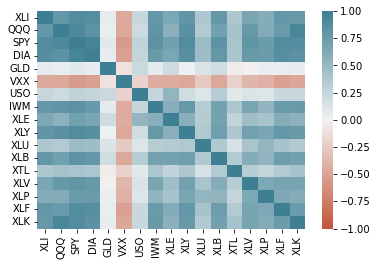

In [14]:
# 히트맵을 사용하여 상관관계 시각화

etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True))

### __1.7.1 산점도__

#### 산점도 : x축과 y축이 서로 다른 두 개의 변수를 나타내는 도표

#### 각 점 : 하나의 레코드 의미

findfont: Font family ['NanumSquare'] not found. Falling back to DejaVu Sans.


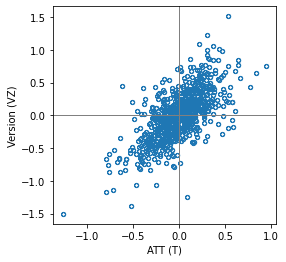

In [15]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4,4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Version (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

#### v1이 높아질 때, v2도 높아지고, v1이 낮아질 때, v2도 낮아지는 경우 : 양의 상관관계(반대일 경우 음의 상관관계)

## __1.8 두 개 이상의 변수 탐색하기__

#### 평균, 분산 -> 한 번에 하나의 변수(일변량분석)
#### 상관분석 -> 두 변수의 비교(이변량분석)
#### 변수가 셋 이상 -> 다변량분석

#### 이변량, 다변량분석은 데이터가 수치형인지, 범주형인지, 그 외 데이터의 특성에 따라 달라짐

### __1.8.1 육각형 구간과 등고선(수치형 변수 대 수치형 변수를 시각화)__

#### 산점도 : 데이터의 개수가 많을 땐 괜찮음 but 레코드 수가 많을 때 알아보기 어려움

#### 육각형 구간 : 두 변수를 육각형 모양의 구간으로 나눈 그림

#### 점으로 표현하는 대신 기록값을 육각형 모양의 구간으로 나누고, 각 구간에 포함된 기록값의 개수에 따라 색깔을 표시

In [8]:
# 데이터 필터링

kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

(432693, 3)

Text(0, 0.5, 'Tax-Assessed Value')

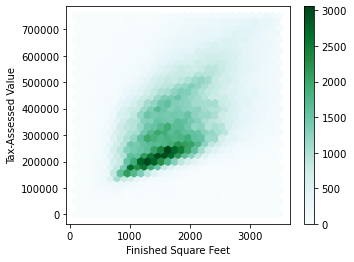

In [17]:
# 육각형 구간 도표
# 집의 크기와 과세 평갸액을 나타낸 육각형 구간 도표

ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', # hexbin 메서드 : 육각형 구간 도표
                         gridsize=30, sharex=False, figsize=(5,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

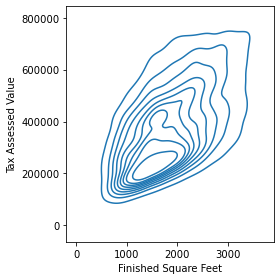

In [5]:
# 산점도 위에 등고선 사용
# 등고선 위의 점들은 밀도가 같고, 꼭대기로 갈 수록 밀도는 높아짐

fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

### __1.8.2 범주형 변수 대 범주형 변수__

#### 분할표 : 두 가지 이상의 범주형 변수의 빈도수를 기록한 표, 두 범주형 변수를 요약하는 데 효과적

In [18]:
crosstab =  lc_loans.pivot_table(index='grade', columns='status',
                                 aggfunc=lambda x: len(x), margins=True) # margins = 열과 행의 합계 추가, aggfunc : 분석 메서드
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [19]:
df = crosstab.loc['A':'G',:].copy() # 열 합계를 무시하고 피벗 테이블의 복사본을 만듦
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0) # 행 합계로 행을 나눔

df['All'] = df['All'] / sum(df['All']) # All 열을 총합으로 나눔
perc_crosstab = df

perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


### __1.8.3 범주형 변수 대 수치형 변수__

#### 상자그림 : 범주형 변수에 따라 분류된 수치형 변수의 분포를 시각화하여 비교하는 간단한 방법

findfont: Font family ['NanumSquare'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumSquare'] not found. Falling back to DejaVu Sans.


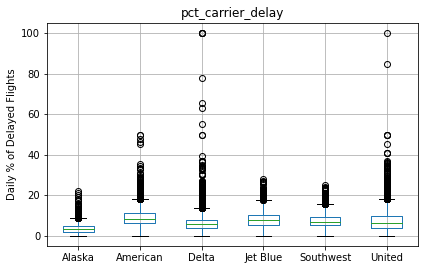

In [5]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

#### 바이올린 도표 : 상자그림 보완, y축을 따라 밀도추정 결과를 동시에 시각화
#### 상자그림에서는 바로 보이지 않는 데이터의 분포를 볼 수 있다.
#### 상자그림 :  데이터의 특잇값들을 좀 더 명확히 보여줌

C:\Users\sma06\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


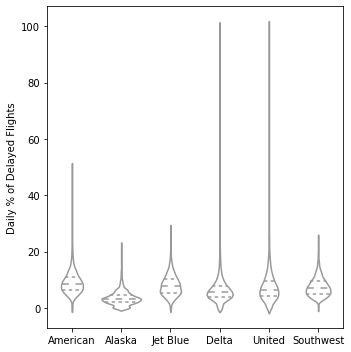

In [7]:
# 바이올린 도표
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.violinplot(airline_stats.airline, airline_stats.pct_carrier_delay,
                    inner='quartile',color='white')

ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

### __1.8.4 다변수 시각화하기__

#### 조건화 -> 두 변수 비교용 도표(산점도, 육각형 구간, 상자그림)를 더 여러 변수를 비교하는 용도로 확장하여 활용 가능

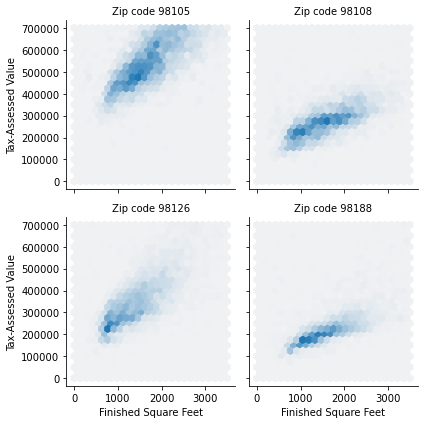

In [12]:
# 우편번호 별로 묶어서 도식화

zip_codes = [98188,98105,98108,98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x,y,color, **kwargs): # 육각형 구간
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
# 조건 변수 지정 시 col 및 row 인수 사용, 단일 조건 변수의 경우 col wrap과 함께 col을 사용하여 패싯 그래프를 여러 행으로 래핑

g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
      extent=[0, 3500, 0, 700000]) 
# map 메서드 : 다른 우편번호에 대한 원래 데이터 집합의 서브셋에 대해 hexbin 함수 호출
# extent : x축과 y축의 한계 지정

g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}')